# Project: No-Show Appointments Dataset Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

> We are interested to find trends between patients who showed-up for their appointments and how they differ from the patients who didn't show-up. This could be helpful in predicting if a patient will show up for their scheduled appointment

> some questions we will try to answer includes: 
<br> -Does the patient’s age have an effect on the appointment status?
<br> -Does the patient’s characteristics (Hypertension, diabetes, handicap … etc) affect their ability to show up for appointments?
<br> -Does receiving an SMS rise the possibility of showing up for appointments?
<br> -Is there a relation between the gender and the appointment status?


In [123]:
# imports 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [124]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [125]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [126]:
df.shape

(110527, 14)

In [127]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Display the updated dataframe 
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [128]:
#converting Scdeduled Day and Appointment Day to datetime
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

df['diff_day']= df['AppointmentDay'] - df['ScheduledDay']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
diff_day          110527 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(3), timedelta64[ns](1)
memory usage: 12.6+ MB


In [129]:
#creating columns for year, month and day to analyze the data
df['s_year'] = df['ScheduledDay'].dt.year 
df['s_month'] = df['ScheduledDay'].dt.month 
df['s_day'] = df['ScheduledDay'].dt.day 

df['a_year'] = df['AppointmentDay'].dt.year 
df['a_month'] = df['AppointmentDay'].dt.month 
df['a_day'] = df['AppointmentDay'].dt.day 

df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,diff_day,s_year,s_month,s_day,a_year,a_month,a_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,0 days,2016,4,29,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,0 days,2016,4,29,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,No,0 days,2016,4,29,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,0 days,2016,4,29,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,No,0 days,2016,4,29,2016,4,29
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,...,0,0,No,2 days,2016,4,27,2016,4,29
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,...,0,0,Yes,2 days,2016,4,27,2016,4,29
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,...,0,0,Yes,2 days,2016,4,27,2016,4,29
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,...,0,0,No,0 days,2016,4,29,2016,4,29
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,...,0,0,No,2 days,2016,4,27,2016,4,29


In [130]:
# Drop Rows with Handcap not equal 0 or 1. 
df = df [df.Handcap !=2]
df = df [df.Handcap !=3]
df = df [df.Handcap !=4]

In [131]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_day,s_year,s_month,s_day,a_year,a_month,a_day
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328,110328.000000,110328.000000,110328.000000,110328.0,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070408,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179,10 days 04:29:06.356319,2015.999438,4.823816,14.252592,2016.0,5.210101,12.499302
std,2.561394e+14,7.129914e+04,23.098231,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931,15 days 06:11:13.727093,0.023699,0.715845,9.345827,0.0,0.473771,9.056674
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00,2015.000000,1.000000,1.000000,2016.0,4.000000,1.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,2016.000000,4.000000,6.000000,2016.0,5.000000,5.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00,2016.000000,5.000000,13.000000,2016.0,5.000000,10.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00,2016.000000,5.000000,22.000000,2016.0,5.000000,19.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00,2016.000000,12.000000,31.000000,2016.0,6.000000,31.000000


In [132]:
# Drop Rows where age is minus. assuming that patient with age = 0 are babies less than one year old
df = df [df.Age >= 0]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,diff_day,s_year,s_month,s_day,a_year,a_month,a_day
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327,110327.000000,110327.000000,110327.000000,110327.0,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,10 days 04:29:14.333934,2015.999438,4.823806,14.252667,2016.0,5.210094,12.499361
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,15 days 06:11:17.038357,0.023699,0.715840,9.345836,0.0,0.473767,9.056694
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00,2015.000000,1.000000,1.000000,2016.0,4.000000,1.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,2016.000000,4.000000,6.000000,2016.0,5.000000,5.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00,2016.000000,5.000000,13.000000,2016.0,5.000000,10.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00,2016.000000,5.000000,22.000000,2016.0,5.000000,19.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00,2016.000000,12.000000,31.000000,2016.0,6.000000,31.000000


In [133]:
#converting 'No-show' column to 0 & 1 to ease the analysis 
df['No-show'] = df['No-show'].replace(to_replace=['No', 'Yes'], value=['0','1'])
df['No-show'] = df['No-show'].astype(np.int64)

In [134]:
df.shape
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,diff_day,s_year,s_month,s_day,a_year,a_month,a_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,0,0 days,2016,4,29,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,0,0 days,2016,4,29,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,0,0 days,2016,4,29,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0,0 days,2016,4,29,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,0,0 days,2016,4,29,2016,4,29


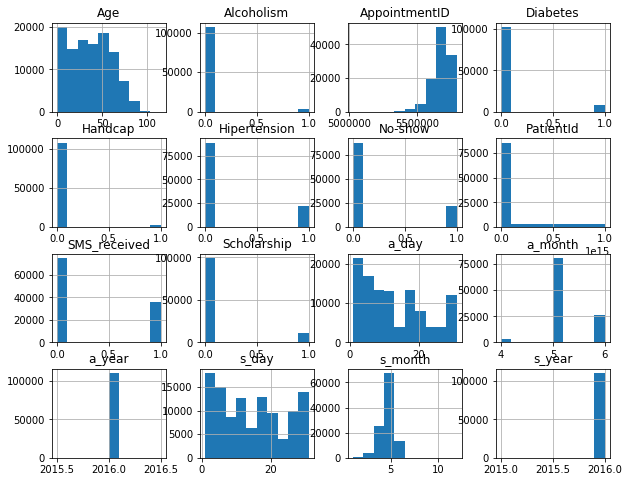

In [135]:
df.hist(figsize=(10,8));

In [136]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,s_year,s_month,s_day,a_year,a_month,a_day
PatientId,1.000000,0.003899,-0.004183,-0.002702,-0.006515,0.001721,0.011055,-0.008184,-0.009859,-0.001374,-0.000932,0.002201,0.003498,NaN,0.001453,0.003333
AppointmentID,0.003899,1.000000,-0.019225,0.022750,0.012776,0.022775,0.033115,0.015175,-0.256866,-0.162461,0.177580,0.817653,-0.025354,NaN,0.489791,0.018654
Age,-0.004183,-0.019225,1.000000,-0.092119,0.503676,0.291760,0.095686,0.081951,0.012774,-0.060794,-0.026834,-0.002967,-0.009207,NaN,0.014755,-0.007454
Scholarship,-0.002702,0.022750,-0.092119,1.000000,-0.019241,-0.024612,0.035224,-0.009192,0.001202,0.029391,0.001405,0.016821,0.007755,NaN,-0.002638,0.002815
Hipertension,-0.006515,0.012776,0.503676,-0.019241,1.000000,0.432264,0.088087,0.081366,-0.006238,-0.036176,-0.035395,0.025166,0.000812,NaN,0.004119,-0.008239
Diabetes,0.001721,0.022775,0.291760,-0.024612,0.432264,1.000000,0.018634,0.054716,-0.014782,-0.015169,-0.006765,0.025730,-0.007042,NaN,0.003952,-0.004239
Alcoholism,0.011055,0.033115,0.095686,0.035224,0.088087,0.018634,1.000000,0.003118,-0.026080,-0.000245,0.004197,0.029111,-0.004718,NaN,0.004098,-0.002676
Handcap,-0.008184,0.015175,0.081951,-0.009192,0.081366,0.054716,0.003118,1.000000,-0.024031,-0.007762,-0.008094,0.016421,-0.000683,NaN,-0.000711,-0.002307
SMS_received,-0.009859,-0.256866,0.012774,0.001202,-0.006238,-0.014782,-0.026080,-0.024031,1.000000,0.126678,-0.018910,-0.294350,0.172722,NaN,0.108225,-0.049488
No-show,-0.001374,-0.162461,-0.060794,0.029391,-0.036176,-0.015169,-0.000245,-0.007762,0.126678,1.000000,-0.006174,-0.160729,0.046533,NaN,-0.020753,0.003576


<a id='eda'></a>
## Exploratory Data Analysis


### The relations between the patient characteristics and not showing for the appointments

In [137]:
#Creating a mask for 'no show' and 'show up' appointments 
showup = df['No-show'] == 0
noshow = df['No-show'] == 1 

# defining fucntion to print 'no show' appointments per charachterstic
def print_data (colname):
    #print("Show Up")
    print(df.groupby([colname,'No-show']).size())

#### Q1: Does the patient’s age have an effect on the appointment status?

In [138]:
df.Age[showup].mean()

37.77709002941544

In [139]:
df.Age[noshow].mean()

34.27910943531735

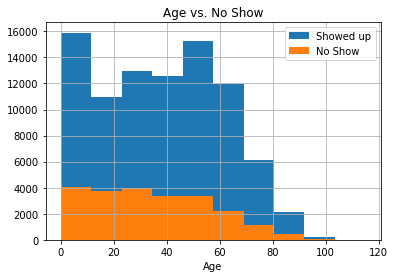

In [140]:
df.Age[showup].hist(label='Showed up')
df.Age[noshow].hist(label='No Show');
plt.legend();
plt.title('Age vs. No Show');
plt.xlabel('Age');

>The highest percentage of 'No show' in comparison to 'Show up' is for teenagers at the same time, the highest percentage of ‘Show up’ in comparison to ‘No show’ is for younger patients (0-10) years old.

#### Q2: Does the patient’s characteristics (Hypertension, diabetes, handicap … etc) affect their ability to show up for appointments?

#### 1. Diabetes

Diabetes  No-show
0         0          81571
          1          20856
1         0           6478
          1           1422
dtype: int64


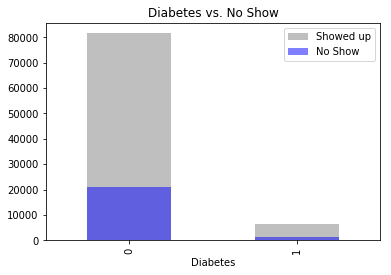

In [141]:
df.Diabetes[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Diabetes[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Diabetes vs. No Show');
plt.xlabel('Diabetes');

print_data ('Diabetes')

In [142]:
print (df.Diabetes[showup].value_counts())
print (len(df))

0    81571
1     6478
Name: Diabetes, dtype: int64
110327


> 7.16 % of the appointments were for people with Diabetes. In 18% of these appointments the patients didn't show up. 

#### 2. Hipertension

Hipertension  No-show
0             0          70081
              1          18530
1             0          17968
              1           3748
dtype: int64


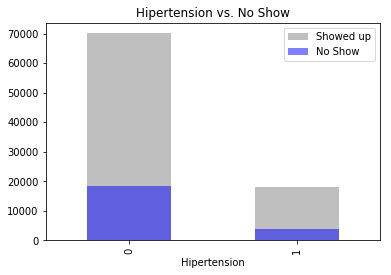

In [143]:
df.Hipertension[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Hipertension[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Hipertension vs. No Show');
plt.xlabel('Hipertension');

print_data ('Hipertension')

> 19.68% % of the appointments were for people with Hipertension. In 17.26% of these appointments the patients didn't show up. 

#### 3. Alcoholism

Alcoholism  No-show
0           0          85372
            1          21603
1           0           2677
            1            675
dtype: int64


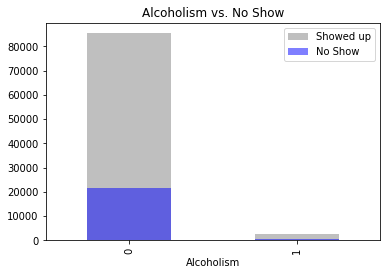

In [144]:
df.Alcoholism[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Alcoholism[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Alcoholism vs. No Show');
plt.xlabel('Alcoholism');

print_data ('Alcoholism')

> 3.04 % of the appointments were for people who were alcoholism. In 20.14% of these appointments the patients didn't show up. 

#### 4. Handcap

Handcap  No-show
0        0          86373
         1          21912
1        0           1676
         1            366
dtype: int64


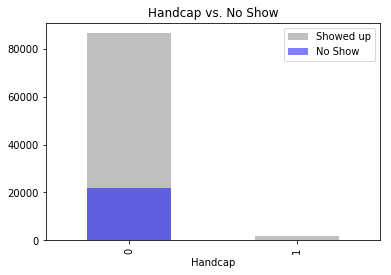

In [145]:
df.Handcap[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Handcap[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Handcap vs. No Show');
plt.xlabel('Handcap');

print_data ('Handcap')

> 1.85% % of the appointments were for people  who were handcapped. In 17.92% of these appointments the patients didn't show up. 

#### 5. Scholarship

Scholarship  No-show
0            0          79783
             1          19701
1            0           8266
             1           2577
dtype: int64


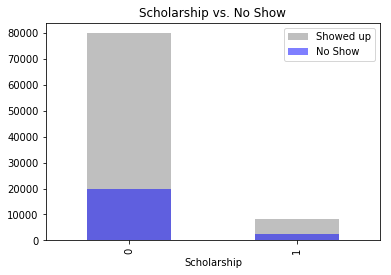

In [146]:
df.Scholarship[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Scholarship[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Scholarship vs. No Show');
plt.xlabel('Scholarship');

print_data ('Scholarship')

> Only 9.83% of the appointments were for people who are sponsered with a scholarship. However, 23.77% of these appointments were marked as 'No Show'

#### Q3: Does receiving an SMS rise the possibility of showing up for appointments?

SMS_received  No-show
0             0          62389
              1          12503
1             0          25660
              1           9775
dtype: int64


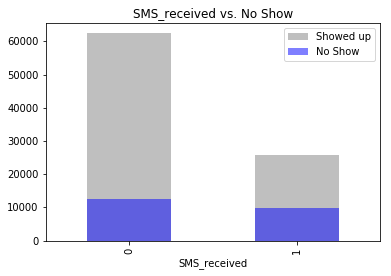

In [147]:
df.SMS_received[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('SMS_received vs. No Show');
plt.xlabel('SMS_received');

print_data ('SMS_received')

> For 32.12 % of the appointments the patient recived the SMS. However, in 27.59% of these appointments the patient didn't show up.

#### Q4: Is there a relation between the gender and the appointment status?

Gender  No-show
F       0          57162
        1          14568
M       0          30887
        1           7710
dtype: int64


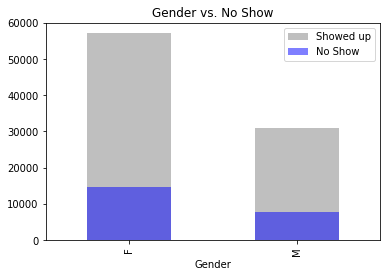

In [148]:
df.Gender[showup].value_counts().plot(kind='bar', alpha=0.5, label='Showed up', color='gray')
df.Gender[noshow].value_counts().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Gender vs. No Show');
plt.xlabel('Gender');

print_data ('Gender')

> 34.98% of the appointments were for male patients and 65.02% for female patients. 

> 20.31% of the appointments for females were marked as 'No show'

> 19.98% of the appointments for males were marked as 'No show'

#### Appointment and Scheduled months

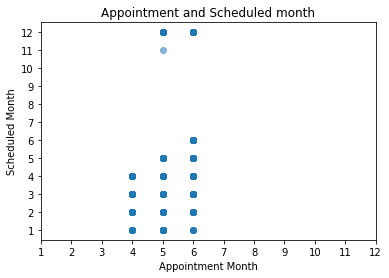

In [154]:

plt.scatter(df['a_month'], df['s_month'],alpha=0.5);
plt.title('Appointment and Scheduled month')
plt.xlabel('Appointment Month')
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Scheduled Month')
plt.yticks(np.arange(1, 13, step=1))

plt.show()


> As the data shows all the appointemts are during the second quarter of the year. However, no appointment was schduled during the months 7,8,9 and 10

#### Gender & Reciving SMS 

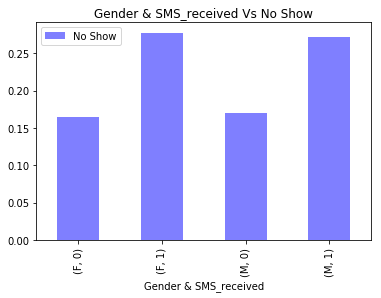

In [150]:
df.groupby(['Gender','SMS_received'])['No-show'].mean().plot(kind='bar', alpha=0.5, label = 'No Show', color='blue');
plt.legend();
plt.title('Gender & SMS_received Vs No Show');
plt.xlabel('Gender & SMS_received');

> from the chart above it is clear that there is no differnce when it comes to gender and reciving SMS status. femals and males who are reciving the SMS tend to behave the same 

<a id='conclusions'></a>
## Conclusions

> According to the above analysis, it is hard to find clear coorolations between the patient characteristics and the behaviour of 'No show' to the appointments. 

> I was trying to study the behaviour of the patients by monitoring the same patient's appointments status. However, this didn't work since the patientID wasn't unique when trying to build "Patient Table" which means that, some patients characteristics where changing through time and made it difficult to conduct such analysis. 

### General comments on the data 
> Overall, the data was suffecint to conduct the analysis and there was no missing values or duplication. However, I was hoping to have the data in 2 seperate tables. one for patients and the other for the appointments. this would help in the analysis. Moreover, I tried to link 'No show' behaviour with the date delta between the appointment and the scheduled day. but the data didn't help me. I belive the data is rich and we can reach to much more intersting findings if we enhance its structre a bit
